<a href="https://colab.research.google.com/github/ikhsanadi/TugasPBO1/blob/master/datmin_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline



In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = "Chapter10DataSet_Training.csv"

df = pd.read_csv(data, header=None)

In [ ]:
# view dimensions of dataset

df.shape

(661, 11)

In [ ]:
# preview the dataset

df.head()


,0,1,2,3,4,5,6,7,8,9,10
0,9552,M,61,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,Late Majority
1,6757,M,27,M,Regular,Yes,No,Yes,No,Bank Transfer,Innovator
2,3599,F,29,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
3,6811,M,49,M,Seldom,Yes,Yes,Yes,Yes,Website Account,Early Adopter
4,4104,M,29,S,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority


In [ ]:
col_names = ['user','gender', 'age', 'marital', 'website_activity', 'Browsed_Electronics', 'Bought_Electronics', 'Bought_Digital', 'Bought_Books','Payment', 'Adoption']


df.columns = col_names

col_names

['user',
 'gender',
 'age',
 'marital',
 'website_activity',
 'Browsed_Electronics',
 'Bought_Electronics',
 'Bought_Digital',
 'Bought_Books',
 'Payment',
 'Adoption']

In [ ]:
# let's again preview the dataset
df.drop(['user',], axis=1, inplace=True)


In [ ]:
df.drop(df.head(0).index, inplace=True)

In [ ]:
df.head()

,gender,age,marital,website_activity,Browsed_Electronics,Bought_Electronics,Bought_Digital,Bought_Books,Payment,Adoption
0,M,61,M,Seldom,Yes,Yes,Yes,No,Bank Transfer,Late Majority
1,M,27,M,Regular,Yes,No,Yes,No,Bank Transfer,Innovator
2,F,29,M,Seldom,Yes,Yes,Yes,Yes,Bank Transfer,Early Adopter
3,M,49,M,Seldom,Yes,Yes,Yes,Yes,Website Account,Early Adopter
4,M,29,S,Seldom,Yes,Yes,Yes,No,Website Account,Late Majority


In [ ]:
#view summary of data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 660
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               661 non-null    object
 1   age                  661 non-null    int64 
 2   marital              661 non-null    object
 3   website_activity     661 non-null    object
 4   Browsed_Electronics  661 non-null    object
 5   Bought_Electronics   661 non-null    object
 6   Bought_Digital       661 non-null    object
 7   Bought_Books         661 non-null    object
 8   Payment              661 non-null    object
 9   Adoption             661 non-null    object
dtypes: int64(1), object(9)
memory usage: 56.8+ KB


In [ ]:
df['Adoption'].value_counts()

Early Adopter     205
Early Majority    186
Late Majority     172
Innovator          98
Name: Adoption, dtype: int64

In [ ]:
# check missing values in variables

df.isnull().sum()

gender                 0
age                    0
marital                0
website_activity       0
Browsed_Electronics    0
Bought_Electronics     0
Bought_Digital         0
Bought_Books           0
Payment                0
Adoption               0
dtype: int64

In [ ]:
X = df.drop(['Adoption'], axis=1)

y = df['Adoption']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((627, 9), (34, 9))

In [ ]:
# check data types in X_train

X_train.dtypes

gender                 object
age                     int64
marital                object
website_activity       object
Browsed_Electronics    object
Bought_Electronics     object
Bought_Digital         object
Bought_Books           object
Payment                object
dtype: object

In [ ]:
X_train.head()

,gender,age,marital,website_activity,Browsed_Electronics,Bought_Electronics,Bought_Digital,Bought_Books,Payment
76,F,27,S,Seldom,Yes,Yes,Yes,No,Credit Card
354,M,27,M,Regular,Yes,No,No,No,Bank Transfer
656,M,48,S,Frequent,Yes,Yes,Yes,Yes,Website Account
275,F,27,M,Regular,Yes,Yes,Yes,Yes,Monthly Billing
10,F,40,M,Regular,Yes,Yes,No,Yes,Website Account


In [ ]:
pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.1 MB/s 


In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['gender', 'marital', 'website_activity', 'Browsed_Electronics', 'Bought_Electronics', 'Bought_Digital', 'Bought_Books','Payment'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,gender,age,marital,website_activity,Browsed_Electronics,Bought_Electronics,Bought_Digital,Bought_Books,Payment
76,1,27,1,1,1,1,1,1,1
354,2,27,2,2,1,2,2,1,2
656,2,48,1,3,1,1,1,2,3
275,1,27,2,2,1,1,1,2,4
10,1,40,2,2,1,1,2,2,3


In [ ]:
X_test.head()

,gender,age,marital,website_activity,Browsed_Electronics,Bought_Electronics,Bought_Digital,Bought_Books,Payment
630,1,48,2,1,1,1,1,1,2
271,1,17,1,1,1,2,1,2,3
135,1,31,2,1,1,1,2,1,1
483,1,64,2,1,1,1,1,2,1
90,1,17,2,1,1,1,1,1,2


In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.5000


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Early Majority', 'Innovator', 'Innovator', 'Early Majority',
       'Innovator', 'Late Majority', 'Early Majority', 'Innovator',
       'Early Majority', 'Innovator', 'Late Majority', 'Early Majority',
       'Innovator', 'Early Majority', 'Late Majority', 'Innovator',
       'Early Adopter', 'Early Adopter', 'Early Adopter', 'Early Adopter',
       'Late Majority', 'Late Majority', 'Early Adopter', 'Early Adopter',
       'Early Adopter', 'Early Adopter', 'Early Majority',
       'Early Adopter', 'Early Adopter', 'Innovator', 'Early Adopter',
       'Early Adopter', 'Innovator', 'Early Adopter', 'Early Adopter',
       'Early Adopter', 'Early Adopter', 'Early Majority',
       'Early Majority', 'Innovator', 'Early Adopter', 'Early Adopter',
       'Early Adopter', 'Early Majority', 'Early Adopter',
       'Early Majority', 'Late Majority', 'Early Adopter',
       'Early Adopter', 'Early Adopter', 'Early Adopter', 'Innovator',
       'Early Adopter', 'Late Majority', 'Late Majo

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8660


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8660
Test set score: 0.5000


[Text(0.5574844018932874, 0.9666666666666667, 'X[3] <= 1.5\ngini = 0.736\nsamples = 627\nvalue = [196, 174, 96, 161]'),
 Text(0.2665393717728055, 0.9, 'X[7] <= 1.5\ngini = 0.687\nsamples = 399\nvalue = [105, 129, 17, 148]'),
 Text(0.07987306368330464, 0.8333333333333334, 'X[1] <= 25.5\ngini = 0.505\nsamples = 213\nvalue = [10, 62, 5, 136]'),
 Text(0.0189328743545611, 0.7666666666666667, 'X[1] <= 20.5\ngini = 0.213\nsamples = 34\nvalue = [0, 30, 1, 3]'),
 Text(0.01549053356282272, 0.7, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0]'),
 Text(0.022375215146299483, 0.7, 'X[6] <= 1.5\ngini = 0.335\nsamples = 20\nvalue = [0, 16, 1, 3]'),
 Text(0.010327022375215147, 0.6333333333333333, 'X[0] <= 1.5\ngini = 0.24\nsamples = 15\nvalue = [0, 13, 1, 1]'),
 Text(0.0068846815834767644, 0.5666666666666667, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0]'),
 Text(0.013769363166953529, 0.5666666666666667, 'X[1] <= 21.5\ngini = 0.406\nsamples = 8\nvalue = [0, 6, 1, 1]'),
 Text(0.0068846815834767644, 0.

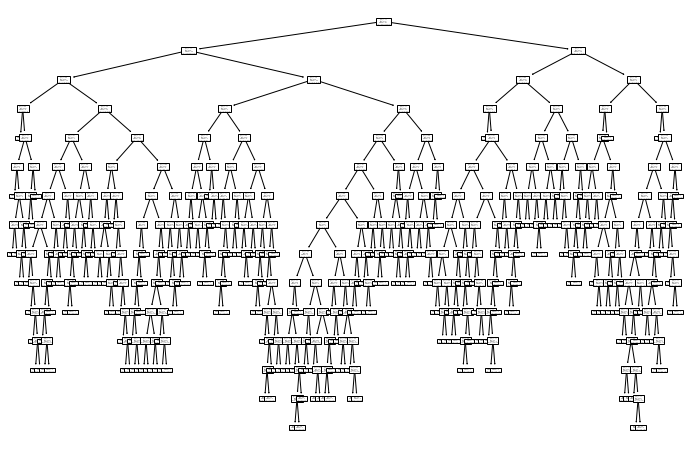

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

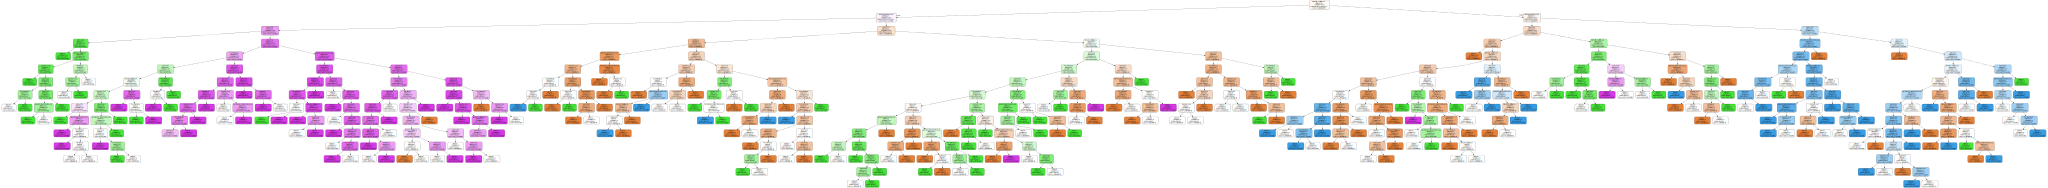

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled= True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.6471


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Late Majority', 'Early Adopter', 'Innovator', 'Innovator',
       'Innovator', 'Late Majority', 'Early Majority', 'Innovator',
       'Early Majority', 'Early Adopter', 'Late Majority',
       'Early Majority', 'Innovator', 'Early Majority', 'Late Majority',
       'Innovator', 'Innovator', 'Early Adopter', 'Early Adopter',
       'Early Adopter', 'Late Majority', 'Late Majority', 'Early Adopter',
       'Early Majority', 'Early Adopter', 'Early Adopter',
       'Early Majority', 'Early Adopter', 'Early Adopter', 'Innovator',
       'Late Majority', 'Early Adopter', 'Early Adopter',
       'Early Majority', 'Early Majority', 'Early Adopter',
       'Early Adopter', 'Innovator', 'Early Majority', 'Early Adopter',
       'Early Adopter', 'Early Majority', 'Early Adopter',
       'Late Majority', 'Innovator', 'Late Majority', 'Late Majority',
       'Innovator', 'Early Adopter', 'Early Majority', 'Early Adopter',
       'Innovator', 'Early Adopter', 'Late Majority', 'Late Majority

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.6204


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.6204
Test set score: 0.6471


[Text(0.5, 0.875, 'X[3] <= 1.5\nentropy = 1.956\nsamples = 627\nvalue = [196, 174, 96, 161]'),
 Text(0.25, 0.625, 'X[7] <= 1.5\nentropy = 1.758\nsamples = 399\nvalue = [105, 129, 17, 148]'),
 Text(0.125, 0.375, 'X[1] <= 25.5\nentropy = 1.266\nsamples = 213\nvalue = [10, 62, 5, 136]'),
 Text(0.0625, 0.125, 'entropy = 0.618\nsamples = 34\nvalue = [0, 30, 1, 3]'),
 Text(0.1875, 0.125, 'entropy = 1.117\nsamples = 179\nvalue = [10, 32, 4, 133]'),
 Text(0.375, 0.375, 'X[1] <= 37.5\nentropy = 1.536\nsamples = 186\nvalue = [95, 67, 12, 12]'),
 Text(0.3125, 0.125, 'entropy = 1.47\nsamples = 72\nvalue = [45, 14, 10, 3]'),
 Text(0.4375, 0.125, 'entropy = 1.427\nsamples = 114\nvalue = [50, 53, 2, 9]'),
 Text(0.75, 0.625, 'X[7] <= 1.5\nentropy = 1.756\nsamples = 228\nvalue = [91, 45, 79, 13]'),
 Text(0.625, 0.375, 'X[1] <= 53.5\nentropy = 1.75\nsamples = 133\nvalue = [62, 35, 27, 9]'),
 Text(0.5625, 0.125, 'entropy = 1.566\nsamples = 92\nvalue = [52, 11, 24, 5]'),
 Text(0.6875, 0.125, 'entropy = 1.

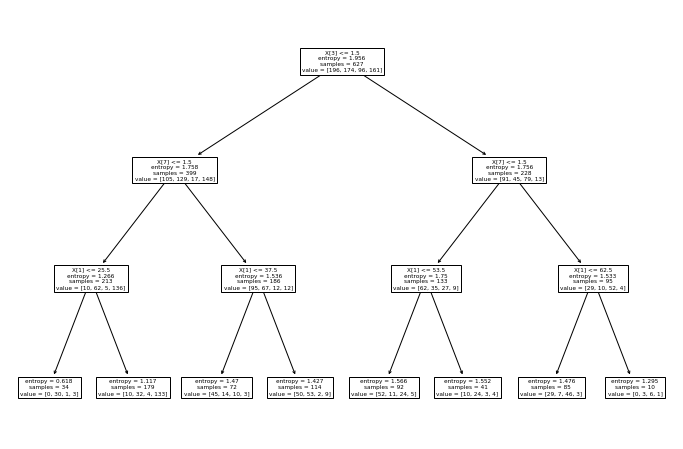

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

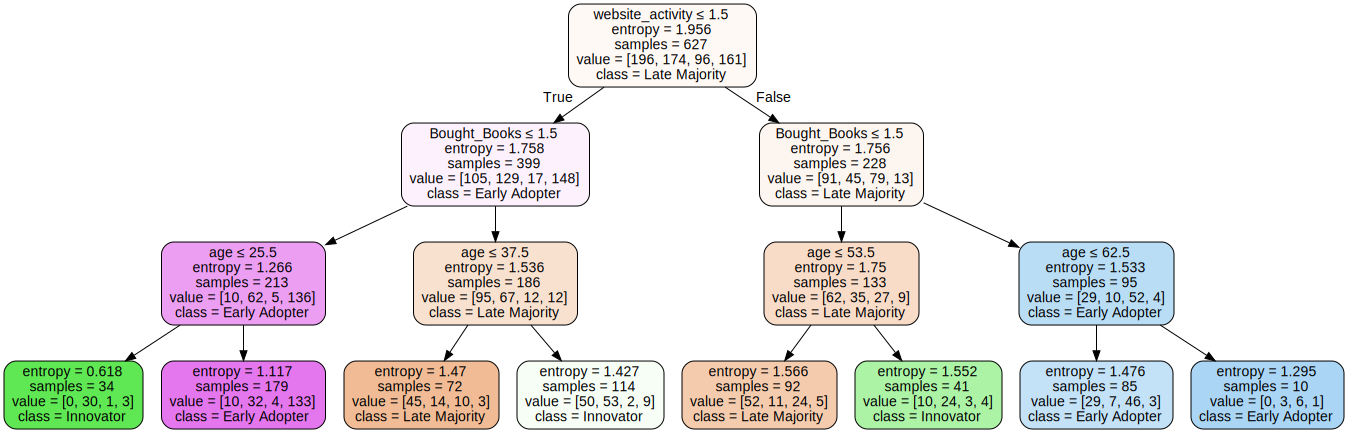

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 